# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  60 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  30 баллов
* Задача 4 &mdash;  30 баллов







-----

In [22]:
# Bot check

# HW_ID: phds_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
pip install torch 

  Using cached torch-2.2.1-cp310-cp310-win_amd64.whl (198.6 MB)
  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached fsspec-2024.2.0-py3-none-any.whl (170 kB)
  Using cached typing_extensions-4.10.0-py3-none-any.whl (33 kB)
  Using cached filelock-3.13.1-py3-none-any.whl (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Матвей\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

from IPython.display import clear_output

from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

---
## <b><font color="blue">Легкая часть</font></b>
### Задача 1

#### *Профиль биология*

Мы будем исследовать датасет по экспрессиям различных генов (RNA-seq), используемых для предсказания возраста пациентов.

In [ ]:
df = pd.read_csv("Rnaseq_age_reg.csv")
df.head()

Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец `Age`, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

**Переходите к общей части.**

#### *Профиль физика*

In [62]:
df = pd.read_csv("physics_data.csv", index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,pubchem_id,Eat
0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,-2.653680,...,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,25004,-19.013763
1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,18.387221,...,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,25005,-10.161019
2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,-0.927953,...,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,25006,-9.376619
3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,3.657935,...,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,25009,-13.776438
4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,-0.181278,...,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,25011,-8.537140


Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец Eat, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

In [63]:
X = df.drop('Eat', axis=1)
y = df['Eat']
X_train, X_test = train_test_split(X, test_size = 0.3, random_state=69) 
y_train, y_test = train_test_split(y, test_size = 0.3, random_state=69)


### Общая часть

Отмасштабируйте данные:

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучите модель линейной регрессии и посмотрите на значения метрик на тесте. Что вы можете сказать про результат обучения?

In [65]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))




0.2407779155667411
-8.321343003820829


Модель плоха, поскольку предсказывает хуже, чем в среднем (по коэффициенту R2)

Обучите линейные модели с регуляризациями, которые мы проходили ранее. Для каждой из моделей постройте графики зависимости метрик r2 и MAPE от коэфициента регуляризации. Можно пользоваться кодом из домашнего задания по регуляризации. Сильно ли улучшился результат? 

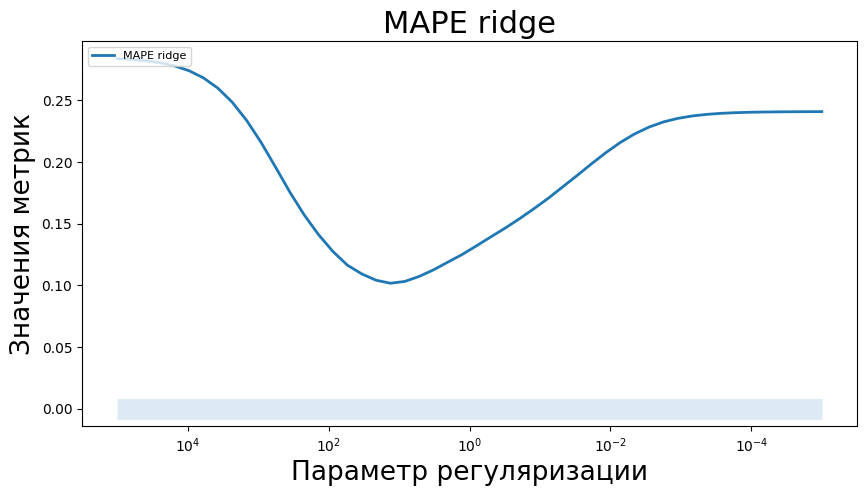

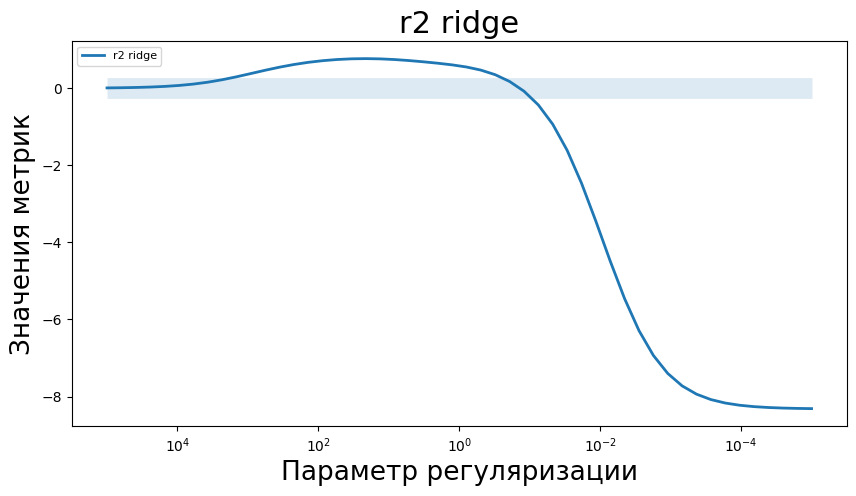

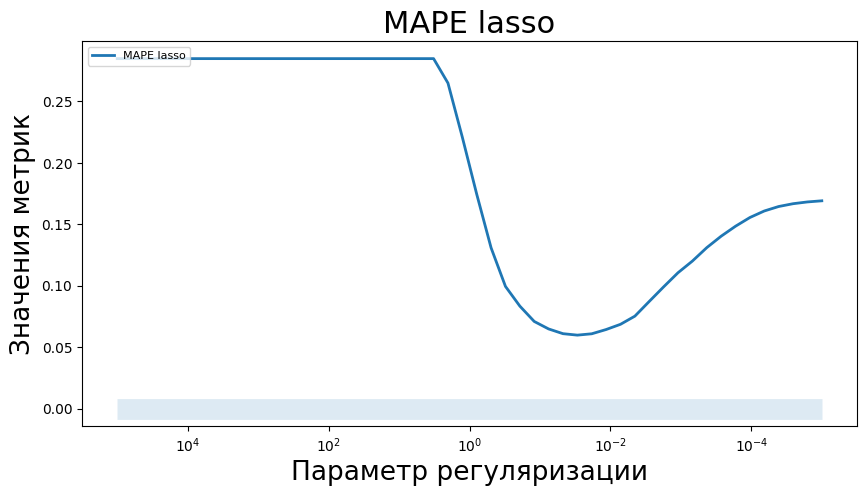

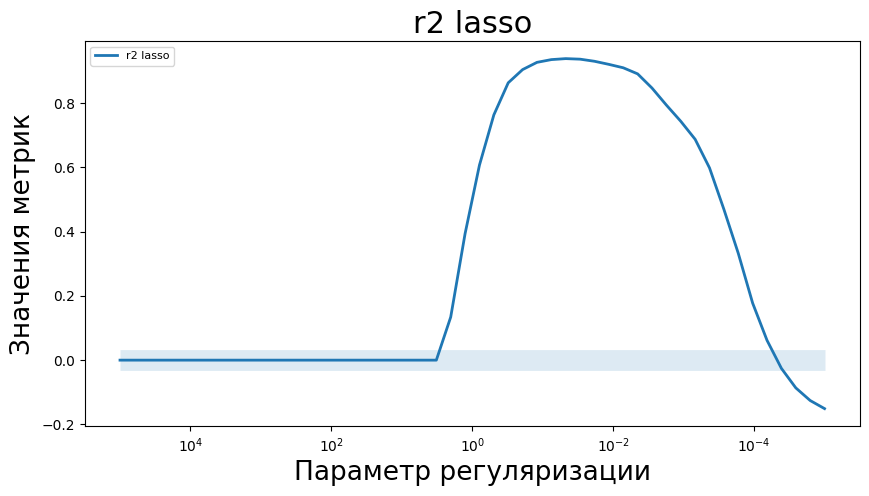

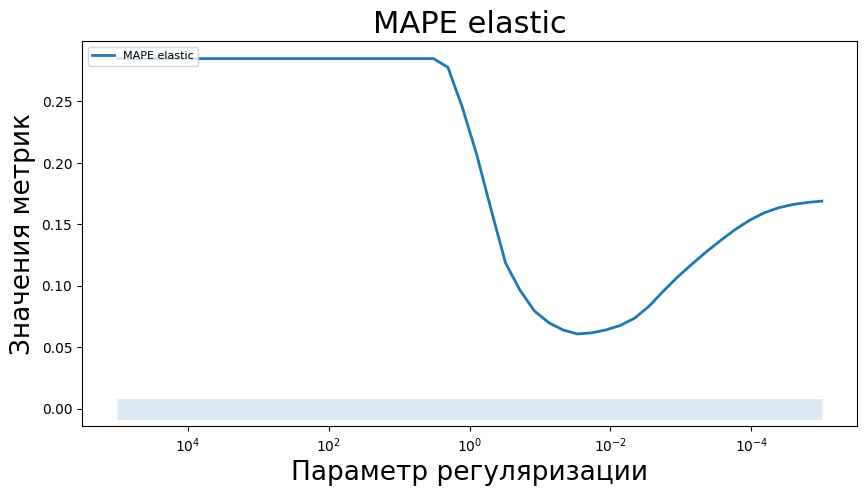

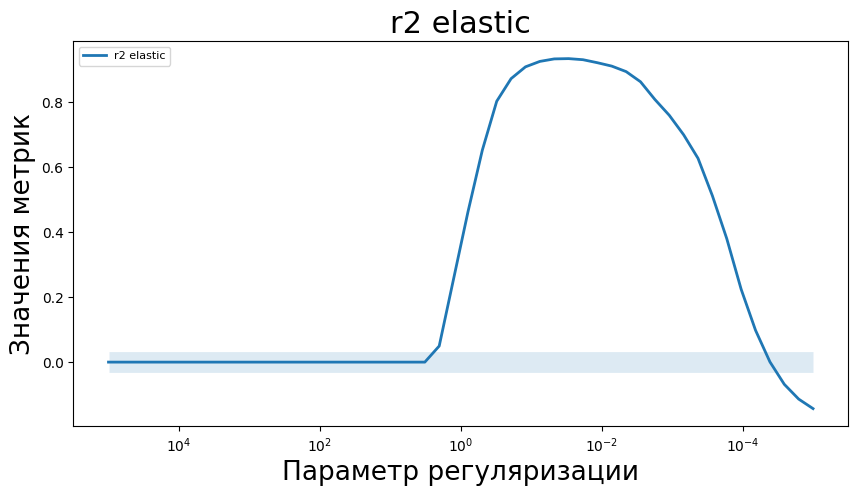

In [66]:
def calculate_mape_error(model, X, y, log_min, log_max, 
               num):
   
    alphas = np.logspace(log_min, log_max, num) # сетка параметров   
    errors = [] # ошибки
    for a in alphas:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        if 'l1_ratio' in model.get_params(): # для ElasticNet
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a) # переопределяем параметры модели
        else:
            model.set_params(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append(mean_absolute_percentage_error(y_test, y_pred)) 
    return errors


def calculate_r2(model, X, y, log_min, log_max, 
               num):
   
    alphas = np.logspace(log_min, log_max, num) # сетка параметров   
    errors = [] # ошибки
    for a in alphas:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        if 'l1_ratio' in model.get_params(): # для ElasticNet
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a) # переопределяем параметры модели
        else:
            model.set_params(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append(r2_score(y_test, y_pred)) 
    return errors


def draw_track(errors, log_min, log_max, 
               num, title='', figsize=(10, 5)):
    
    alphas = np.logspace(log_min, log_max, num) # сетка параметров  
    plt.figure(figsize=figsize)
    ax = plt.gca() # используется для получения текущего экземпляра axes
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    
    
    ax.plot(alphas, errors, linewidth=2, label=title) # рисуем коэффициенты в зависимости от alpha
        
    ax.set_xscale('log') # логарифмическая шкала
    ax.set_xlim(ax.get_xlim()[::-1])  # обратить ось
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения метрик', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()


# Ridge регрессия
ridge_model = Ridge(fit_intercept=True)
mape_error_ridge = calculate_mape_error(ridge_model, X, y, -5, 5, 50)
r2_ridge = calculate_r2(ridge_model, X, y, -5, 5, 50)
draw_track(mape_error_ridge, -5, 5, 50, "MAPE ridge")
draw_track(r2_ridge, -5, 5, 50, "r2 ridge")


# Lasso регрессия
lasso_model = Lasso(fit_intercept=True)
mape_error_lasso = calculate_mape_error(lasso_model, X, y, -5, 5, 50)
r2_lasso = calculate_r2(lasso_model, X, y, -5, 5, 50)
draw_track(mape_error_lasso, -5, 5, 50, "MAPE lasso")
draw_track(r2_lasso, -5, 5, 50, "r2 lasso")

# Elastic регрессия
elastic_model = ElasticNet(l1_ratio=0.7, fit_intercept=True)
mape_error_elastic = calculate_mape_error(elastic_model, X, y, -5, 5, 50)
r2_elastic = calculate_r2(elastic_model, X, y, -5, 5, 50)
draw_track(mape_error_elastic, -5, 5, 50, "MAPE elastic")
draw_track(r2_elastic, -5, 5, 50, "r2 elastic")


Выберите оптимальный, на вашь взгляд, параметр для L1-регуляризации, обучите модель Lasso-регрессии, выведите ещё раз метрики r2 и MAPE и проведите отбор признаков: уберите из датасета все те, для которых коэффициент регуляризации оказался нулевым.

In [67]:
model = Lasso(alpha=0.03, fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAPE =", mean_absolute_percentage_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

MAPE = 0.05980160414539033
R2 = 0.9367197202127888


In [68]:
#model.sparse_coef_.nonzero()
df_new = df.iloc[:,model.sparse_coef_.nonzero()[1]]
#print(df_new)
df_new



,0,1,2,3,4,5,6,9,10,11,...,255,259,267,268,272,274,276,283,288,292
0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,-2.653680,9.402571,-11.041235,...,-0.019859,0.105412,0.002530,0.013006,0.040205,-0.001856,0.013344,-0.013579,0.003842,-0.023466
1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,18.387221,7.955942,-2.034648,...,-0.015168,0.005677,0.004729,-0.008663,-0.007660,-0.004274,-0.006265,0.000116,0.005744,-0.000419
2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,-0.927953,-8.175810,-10.214724,...,0.004576,-0.015289,0.010845,0.000146,-0.003220,0.012142,-0.007949,0.013715,-0.019260,-0.003377
3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,3.657935,-8.984441,1.666178,...,-0.030376,-0.059684,-0.013597,-0.010948,-0.009165,0.002940,-0.012305,-0.014887,0.015263,-0.001423
4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,-0.181278,-7.879280,-9.523932,...,0.002235,0.006225,0.005208,-0.000061,-0.009439,0.008849,0.000724,0.000220,0.001795,0.008307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-92.990624,-37.989869,-41.713767,2.459257,-18.563966,12.633696,10.269036,-0.500295,-7.868115,-9.848846,...,-0.002393,-0.005451,0.003347,-0.001177,-0.007184,0.027598,-0.006292,0.015753,-0.007550,-0.000781
496,-33.853515,35.368724,13.274417,25.765836,16.590896,-13.918333,16.788150,-12.302618,-3.861826,9.953043,...,0.017456,0.007270,0.021325,0.011040,-0.010446,-0.006913,0.013194,-0.002642,0.001853,-0.003979
497,-38.655242,11.967915,-12.953299,12.041033,26.324118,4.377067,-5.507208,13.578827,1.504947,-5.584341,...,-0.007609,-0.001864,0.003204,-0.014968,0.007366,0.001508,-0.014278,0.010300,-0.000752,-0.008269
498,-46.056230,18.084091,39.077455,-14.063225,0.243868,-21.583486,8.959267,-0.851561,8.902655,-10.039950,...,-0.003386,0.028726,-0.037418,-0.020214,-0.022984,-0.001064,0.008804,0.008787,-0.032313,0.013263


Теперь обучите простейшую нейронную сеть на уменьшенном датасете, сравните результат с результатами обучения других моделей.

In [548]:
model_new = nn.Sequential(
    nn.Linear(in_features=110, out_features=1)
    )

In [549]:

x = torch.FloatTensor(df_new.values)
y = torch.FloatTensor(df['Eat'])#.reshape(-1,1)
print(x.shape)
print(y.shape)
X_new_train, X_new_val = train_test_split(x, test_size = 0.3, random_state=69)
y_new_train, y_new_val = train_test_split(y, test_size = 0.3, random_state=69) 

X_train_1 = scaler.fit_transform(X_new_train)
X_val_1 = scaler.transform(X_new_val)

torch.Size([500, 110])
torch.Size([500])


In [550]:
optim_func = nn.MSELoss()
optimizer = optim.SGD(model_new.parameters(), lr=0.01)

In [553]:

num_iter = 10000

for i in range(num_iter):
    y_pred_new = model_new(torch.FloatTensor(X_train_1))
    # Шаг 2. 
    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred_new, y_new_train)
    
    # Шаг 3.
    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward(retain_graph=True)

    # Шаг 4.
    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

print(f'Значение MSE на валидационной выборке: {optim_func(model_new(torch.FloatTensor(X_val_1)), y_new_val).item():.5}')

Значение MSE на валидационной выборке: 11.958


In [551]:
with torch.no_grad():
     y_pred_super = model_new(torch.FloatTensor(X_val_1)).numpy()
     print(f'R2: {round(r2_score(y_new_val, y_pred_super), 2)} \nMSE: {round(mean_squared_error(y_new_val, y_pred_super), 2)} \nMAPE: {round(mean_absolute_percentage_error(y_new_val, y_pred_super), 2)}')

R2: -10.77 
MSE: 140.7100067138672 
MAPE: 0.9900000095367432


**Вопрос:** объясните полученный результат.

Модель, основанная на градиентном спуске, предсказывает намного лучше, чем модель без, это видно по метрике MSE

Сравните все модели, поясняя полученные результаты и значения метрик.

**Вывод:**

Регуляризации позволяют найти параметры, при которых ошибки минимальны. Удалось найти такую альфа, что MAPE порядка 6 процентов. На сокращенном датафрейме получили два различных результата: намного сильнее выглядит нейронная сеть с градиентным спуском, ее точность выше как минимум в 10 раз.

---
### Задача 2
#### *Профиль физика*

Скачайте [датасет](https://drive.google.com/file/d/1QqYK7Go96vR4l66MShlUuXxY0_FaBcYB/view?usp=sharing), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)


In [ ]:
data = pd.read_csv('Z_boson.csv')
data.head()

Удалите столбцы `Unnamed: 0`, `Run` и `Event`, так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец `class`) к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.


In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(font_scale=2.0)
sns.pairplot(data, hue="class", palette="deep")

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [142]:
# исходя из графиков, отберём признаки для обучения
selected_features = [<...>]
X = data[selected_features]

In [143]:
# таргет преобразуем из строк "Zee", "Zmumu" к 0 и 1
<...>

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

**Переходите к общей части.**

### Профиль биология

Скачайте [датасет](https://miptstats.github.io/courses/ad_mipt.html), описывающий влияние курения и алкоголя на человека. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)

In [151]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")

In [ ]:
df.describe()

In [ ]:
df.columns, df.shape

In [154]:
column_names = df.columns[1:-2]# нам не нужны гендер и таргеты сейчас

In [ ]:
column_names

Попробуем классифицировать людей с плохими привычками и без них, чтобы облегчить нам задачу. Для этого создадим дополнительный столбец в таблице, который будет содержать информацию о том, имеет ли человек вредные привычки или нет.

In [156]:
def smoking_preprocessing(x):
  if x == 3 or x == 2:
    return 1
  else:
    return 0

def drinking_preprocessing(x):
  if x == 'Y':
    return 1
  else:
    return 0

In [157]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].apply(func = smoking_preprocessing)
df['DRK_YN'] = df['DRK_YN'].apply(func = drinking_preprocessing)

In [158]:
df['bad_habits'] = df['DRK_YN']+df['SMK_stat_type_cd']-df['DRK_YN']*df['SMK_stat_type_cd']

Теперь смотрим на разделение по привычкам

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[:7])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[7:15])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[15:])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [159]:
target_1 = df.pop('SMK_stat_type_cd')
target_2 = df.pop('DRK_YN')
target_3 = df.pop('bad_habits')

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [160]:
# исходя из графиков, отберём признаки для обучения (нас интересуют вредные привычки)
selected_features = [<...>]
X = data[selected_features]

In [161]:
# данных очень много, поэтому для экономии времени автор ноутбука отводит на обучение всего треть датасета
X_train, X_test, y_train, y_test = train_test_split(X, target_3, train_size=0.3)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

## Общая часть

Как вы помните, в задаче классификации предсказывается вероятность. На основании этой вероятности можно делать вывод о принадлежности объекта к тому или иному классу. Причём не всегда используется порог $P=0.5$. Например, если классы несбалансированы, это значение можно варьировать на интервале (0, 1). Предоставляем вам возможность самим выбрать этот порог и поэкспериментировать.

In [162]:
class_lim_proba = <...> # критерий принадлежности к тому или иному классу

Стандартизируйте данные

Напишем функцию для отрисовки кривых обучения. На одном графике расположим значение функции потерь на трейне и валидации, а на другом &mdash; значение метрики качества на ваш выбор, также для трейна и валидации.

In [164]:
def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    clear_output(wait=True)

    fig = plt.figure(figsize=(20, 7))
    fontsize = 15   # размер шрифта

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=fontsize)
    plt.plot(history['loss_train'], label='train')
    plt.plot(history['loss_val'],   label='val')
    plt.ylabel('лосс',  fontsize=fontsize)
    plt.xlabel('эпоха', fontsize=fontsize)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Метрика', fontsize=fontsize)
    plt.plot(history['metric_train'], label='train')
    plt.plot(history['metric_val'],   label='val')
    plt.ylabel('Значение метрики', fontsize=fontsize)
    plt.xlabel('эпоха',    fontsize=fontsize)
    plt.legend()
    plt.show()

Напишите функцию метрики, которую вы будете использовать, например accuracy.

In [ ]:
def metric(y_true, y_pred):
  <...>
  return metric

#### Создание модели.
В семинаре вы у промежуточных слоёв задавали `in_features = out_features = 1`, а в данном случае вам надо будет создать нейросеть из нескольких слоёв, поставив только у последнего из них `out_features = 1`.

Какой должна быть размерность входа первого слоя?

In [ ]:
model = <...>

model

#### Обучение

В качетсве функции потерь возьмите [бинарную кросс-энтропию](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), а шаг градиентного спуска установите равным 0.5. Можете взять и другие loss и `lr`, если хотите поэкспериментировать.

In [148]:
optim_func = <...>
optimizer = <...>

In [ ]:
batch_size = 2000 # этот
num_iter = 200    # и этот параметры можете также поварьировать
history = {
    'loss_train': [],
    'loss_val': [],
    'metric_train': [],
    'metric_val': [],
}

for i in range(num_iter):
    
    # Так как размер выборки слишком велик, то будем обучать лишь на части данных
    indexes_train = np.random.choice(np.arange(len(X_train)), batch_size, replace=False)
    local_X_train = X_train[indexes_train]
    local_y_train = y_train[indexes_train]

    indexes_val = np.random.choice(np.arange(len(X_val)), batch_size//10, replace=False)
    local_X_val = <...>
    local_y_val = <...>

    # Forward pass: предсказание модели по данным X_train
    y_pred_train = <...>
    with torch.no_grad():
        y_pred_val = <...>


    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss_train = <...>
    with torch.no_grad():
        loss_val = <...>

    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    <...>

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    <...>

    # Зануление градиентов
    <...>

    # Считаем метрику на эпохе (здесь посчитана acuracy, можете реализовать любую другую за доп. баллы)
    metric_train = np.sum((y_pred_train.detach().numpy() >= class_lim_proba).reshape(-1) == local_y_train) / len(local_y_train)
    metric_val = np.sum((y_pred_val.detach().numpy() >= class_lim_proba).reshape(-1) == local_y_val) / len(local_y_val)

    # Сохраняем результаты эпохи
    history['loss_train'].append(loss_train.item())
    history['loss_val'].append(loss_val)
    history['metric_train'].append(metric_train)
    history['metric_val'].append(metric_val)

    # График Метрики + Лосса для трейна и валидации каждую итерацию
    plot_learning_curves(history)

Тестирование

In [ ]:
with torch.no_grad():
      y_pred_test = <...>
      loss_test = <...>
      metric_test = <считается по аналогии с тем, как на обучении>
print(f" Test Loss: {loss_test} \n Test metric: {metric_test}")

**Выводы:**

---
## <b><font color="orange">Сложная часть</font></b>
### Задача 3

В этой задаче мы будем вручную реализовывать усложнение для линейной регрессии, которое вы рассматривали на семинаре. 

Запрещено использовать torch.nn (саму библиотеку torch использовать можно и нужно). Чтобы иметь перед глазами оставим здесь формулы:

$$\widehat{y}(x) = w_1u(x) + b_1,$$

$$u(x) = \sigma(w_0x + b_0),$$

$$\sigma(x) = \text{ReLU}(x) = \begin{equation*}\begin{cases}x, \; x \ge 0, \\ 0, \; \text{иначе,} \end{cases} \end{equation*}$$

$w_0, b_0 \in \mathbb{R}$ &mdash; обучаемые параметры первого слоя, $w_1, b_1 \in \mathbb{R}$ &mdash; обучаемые параметры второго слоя, $\sigma(x)$ &mdash; функция активации, в данном случае мы выбрали `ReLU`.

Реализуйте функцию активации:

In [ ]:
def act_func(x):
    return <...>

Задайте оптимизируемую функцию / функцию ошибки / лосс — [MSE](https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества):

$$
    MSE(\widehat{y}, y) = \frac{1}{n}\sum_{i=1}^n\left(\widehat y_i - y_i\right)^2
$$

In [ ]:
def optim_func(y_pred, y_true):
    return <...>

Обучите вашу модель на датасете с семинарского задания. Сравните полученный результат с результатом семинара.

In [ ]:
# Инициализация параметров
w0 = <...>
b0 = <...>
w1 = <...>
b1 = <...>

# Количество итераций
num_iter = 1000

# Скорость обучения для параметров
lr_w = 0.01
lr_b = 0.05

for i in range(num_iter):

    # Forward pass: предсказание модели
    y_pred = <...>

    # Вычисление оптимизируемой функции (MSE)
    loss = <...>
    # Bakcward pass: вычисление градиентов
    loss.backward()

    # Оптимизация: обновление параметров
    <...>

    # Зануление градиентов
    <...>

**Вывод:**

---
### Задача 4

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронку можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$





**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.


**2.1.** Начнем с производной MSE по выходам сети:
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя:

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$:

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам:

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**

...